In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pwd & ls

/content
drive  sample_data


In [0]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import re
import os
import sys

In [4]:
os.chdir("drive/My Drive/chest_xray_pneumonia")
!pwd & ls

/content/drive/My Drive/chest_xray_pneumonia
chest_xray		main.ipynb	      ResNet.ipynb
Data_exploration.ipynb	Prepare_Kaggle.ipynb


In [7]:
#ROOT_DIR = os.path.dirname(os.path.abspath('')) + "chest_xray/" # For running locally
ROOT_DIR = "chest_xray/"
print(ROOT_DIR)
classes = ["NORMAL", "PNEUMONIA"]
splits = ['train', 'val', 'test']


img_file_name = "train/NORMAL/"+"IM-0117-0001.jpeg"
img_path = os.path.join(ROOT_DIR, img_file_name)
print(img_path)
img = cv2.imread(img_path)
print(img.shape, img.min(), img.max())

chest_xray/
chest_xray/train/NORMAL/IM-0117-0001.jpeg
(1152, 1422, 3) 0 255


In [0]:
def show_patient(file_name):
    img = cv2.imread(file_name)
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15), sharey=True)
    for i, ax in enumerate(axs.flat):
        ax.imshow(img[...,i], "gray")
    
    plt.show()

def show_patients_batch (list_of_files):
    for file in list_of_files:
        show_patient(file)

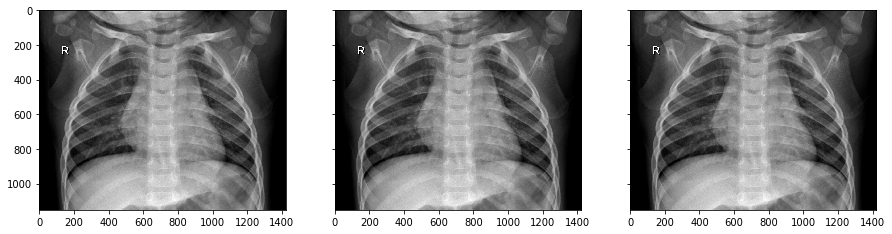

In [0]:
show_patient(img_path)

In [0]:
"""
This cell is to get an idea of the data split and distribution among classes and subclasses
"""

## TO DO: Get statistics on number of images per patient, and confirm that all img files have the same dims


def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

for split in splits:
    for Class in classes:
        path = ROOT_DIR+split+'/'+Class+'/*.jpeg'
        imgs = glob(path)
        imgs.sort(key=natural_keys)
        
        print("For %s %s:"%(split, Class.lower()))
        print('\tNo of imgs available: %d'%len(imgs))
        
        if Class == "PNEUMONIA":
            bacteria = sum(1 for i in imgs if  "bacteria" in i)
            virus = sum(1 for i in imgs if  "virus" in i)
            print("      No of bactrial pneumonia: %d"%bacteria)
            print("      No of viral pneumonia: %d"%virus)
        print("")
            
    print("\n\n")

For train normal:
    No of imgs available: 1341

For train pneumonia:
    No of imgs available: 3875
      No of bactrial pneumonia: 2530
      No of viral pneumonia: 1345




For val normal:
    No of imgs available: 8

For val pneumonia:
    No of imgs available: 8
      No of bactrial pneumonia: 8
      No of viral pneumonia: 0




For test normal:
    No of imgs available: 234

For test pneumonia:
    No of imgs available: 390
      No of bactrial pneumonia: 242
      No of viral pneumonia: 148








# Please note that images do not share the same shape, except in the third dim which is always equal to 3. 

> **The height and width are widely different from image to image.**


Image shape = [w, h, 3], where w and h are different for each image.



